<a href="https://colab.research.google.com/github/yeahginny/TextAnalysis/blob/main/0904_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (22.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120893 files and direc

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Open and inspect the first few lines of the provided file
with open("ratings.txt", "r", encoding="utf-8") as file:
    sample_data = file.readlines()[:10]

sample_data

['id\tdocument\tlabel\n',
 '8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n',
 '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n',
 '4655635\t폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.\t1\n',
 '9251303\t와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지\t1\n',
 '10067386\t안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.\t1\n',
 '2190435\t사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화\t1\n',
 '9279041\t완전 감동입니다 다시봐도 감동\t1\n',
 '7865729\t개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음\t1\n',
 '7477618\t굿\t1\n']

* 총 데이터 수: 200,000개
* id: 각 리뷰에 대한 고유 아이디입니다.
* document: 리뷰 텍스트입니다. 200,000개 중 199,992개의 데이터가 있습니다.
* label: 레이블이며, 0 또는 1의 값을 가집니다. 이 레이블은 리뷰의 감성을 나타낼 수 있습니다 (예: 긍정적인 리뷰 또는 부정적인 리뷰). 데이터는 균형을 이루고 있으며, 각각의 레이블에 100,000개의 리뷰가 있습니다.

In [ ]:
import pandas as pd

# 데이터 불러오고 데이터 프레임형식으로 바꾸기
df_ratings = pd.read_csv("ratings.txt", sep="\t")

# 데이터 정보
df_info = df_ratings.info()
df_description = df_ratings.describe(include='all')

df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


,id,document,label
count,2.000000e+05,199992,200000.000000
unique,NaN,194543,NaN
top,NaN,굿,NaN
freq,NaN,237,NaN
mean,6.739774e+06,NaN,0.500000
std,2.923504e+06,NaN,0.500001
min,3.300000e+01,NaN,0.000000
25%,4.760678e+06,NaN,0.000000
50%,7.527726e+06,NaN,0.500000
75%,9.248413e+06,NaN,1.000000


In [ ]:
# 널값 확인
df_ratings_cleaned = df_ratings.dropna()

null_counts = df_ratings_cleaned.isnull().sum()

null_counts

id          0
document    0
label       0
dtype: int64

In [ ]:
# 타겟갯수
label_counts = df_ratings_cleaned['label'].value_counts()

label_counts

1    99996
0    99996
Name: label, dtype: int64

In [ ]:
# 한글 주석 추가하여 코드 재작성
import re
# 한글 문자가 아닌 문자가 포함되어 있는지 확인하는 함수
def 한글_아닌_문자_포함(text):
    # 한글 문자, 공백 및 일반 구두점 외의 문자를 찾는 정규 표현식
    패턴 = re.compile(r"[^가-힣\s.,?!~]")
    return bool(패턴.search(text))

# 'document' 열에 함수 적용하여 한글 아닌 문자가 포함된 행 찾기
한글_아닌_리뷰 = df_ratings_cleaned[df_ratings_cleaned['document'].apply(한글_아닌_문자_포함)]

# 한글 아닌 문자가 포함된 리뷰의 수 및 샘플 리뷰 출력
한글_아닌_리뷰_수 = 한글_아닌_리뷰.shape[0]
한글_아닌_리뷰_샘플 = 한글_아닌_리뷰.sample(min(10, 한글_아닌_리뷰_수))

한글_아닌_리뷰_수, 한글_아닌_리뷰_샘플[['document', 'label']]


(70382,
                                                  document  label
 25372                           안되 롭스타크 ㅠㅠㅠ 그의 부인도 ㅠㅠㅠ 에휴      1
 146689                                 감독ㅡㅡ 길에서 내하고 만나지마라      0
 90689   처음에는 투박해보여서 꺼렸는데. 일딴 보고나니 스트레스 확풀립니다. 작화도 굉장하고...      1
 36287                                      가장 좋아하는 영화 (2)      1
 110742                  재미없음니다글고 시끄러워요 그리고 인간들 뻣뻣해요 비추천ㅡㅡ      0
 48197       와..이런 반전영화는 처음 봐요.ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 일본경찰이었다니...ㅋㅋ      1
 88354   뭔가 알듯말듯 마음속 깊게 파고들오는 영화는 리뷰를 좀 읽어보고 두번세번 다시 보면...      1
 2863                        재밌네요 ㅎ.ㅎ 주윤발과 조디포스터의 연기에 박수 ㅎ      1
 137236  아니...잘 나가다가 완결이 왜 이럽니까?ㄷㄷ 난대없이 현대로 넘어가다니....막판...      0
 48504                                       내 생애 최고의 로코~♥      1)

In [ ]:
# 한글, 공백 및 일반 구두점을 제외한 모든 문자를 공백으로 변환하는 함수
def 한글_아닌_문자_제거(text):
    # 한글, 공백 및 일반 구두점 외의 문자를 찾아서 공백으로 변환
    변환된_텍스트 = re.sub(r"[^가-힣\s.,?!~]", " ", text)
    return 변환된_텍스트

# 'document' 열에 함수 적용하여 변환
df_ratings_cleaned['document'] = df_ratings_cleaned['document'].apply(한글_아닌_문자_제거)

# 변환 후 샘플 리뷰 확인
sample_after_conversion = df_ratings_cleaned.sample(10)

sample_after_conversion[['document', 'label']]


,document,label
188676,널믿엇지만 실망이컷단다,0
67255,말이필요없습니다. 꼭 극장가서 보세요,1
122110,별 내용없고 과거에 나온 뱀파이어물과 별 차이가없다.그나마 액션이 볼만했다라는것이지,0
139252,아니도대체,0
1137,일말의 순정 잘 보고있어요,1
144050,재미없음,0
109412,아 이제서야 보는데 이건 무슨..영화 아닌줄 알았습니다 저도 빅뱅 좋아하고 그중 승...,0
161848,"좋은 영화라고만하지 왜좋은지 말못하거나, 영상이 아름답데~즉 내용은 모르겠다는 거죠.",0
116467,현시점에서 이런소재가 간간히 필요할때 시점이기는 하다 자기의 정체성을 되돌볼수있는 ...,0
153139,후..해도해도 너무하네..,0


데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

# 데이터를 학습 데이터와 테스트 데이터로 분리 (80%: 학습, 20%: 테스트)
train_data, test_data = train_test_split(df_ratings_cleaned, test_size=0.2, random_state=42)

# 학습 데이터와 테스트 데이터의 크기 확인
train_size = train_data.shape[0]
test_size = test_data.shape[0]

train_size, test_size


(159993, 39999)

분석 모델 구축

TF-IDF (Term Frequency-Inverse Document Frequency)는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 방법입니다. TF-IDF는 각 단어의 빈도와 전체 문서 집합에서의 그 단어의 등장 빈도의 역수를 곱하여 계산됩니다.

TF-IDF 피처를 생성하기 위해 TfidfVectorizer를 사용하겠습니다. 이를 위해 먼저 학습 데이터를 사용하여 TF-IDF 변환기를 학습시키고, 이 변환기를 사용하여 학습 데이터와 테스트 데이터의 피처를 생성하겠습니다.

In [ ]:
!pip install konlpy

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 변환기 초기화
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 학습 데이터를 사용하여 TF-IDF 변환기 학습
tfidf_vectorizer.fit(train_data['document'])

# 학습 데이터와 테스트 데이터를 TF-IDF 기반 피처로 변환
X_train_tfidf = tfidf_vectorizer.transform(train_data['document'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['document'])

# 변환된 피처의 크기 확인
X_train_tfidf.shape, X_test_tfidf.shape

((159993, 5000), (39999, 5000))

로지스틱 회귀를 사용한 감성 분류:
1. 모델 선택:
로지스틱 회귀는 이진 분류 문제에 적합한 모델 중 하나입니다. 감성 분류에서는 주로 긍정(1) 또는 부정(0)으로 분류하는 이진 분류 문제이기 때문에 로지스틱 회귀를 사용할 수 있습니다.

2. 모델 학습:
학습 데이터를 사용하여 로지스틱 회귀 모델을 학습시킵니다. 이때, TF-IDF로 변환된 피처와 대응하는 레이블을 입력으로 제공합니다.

3. 모델 평가:
테스트 데이터를 사용하여 학습된 모델의 성능을 평가합니다. 정확도, 정밀도, 재현율, F1 점수 등 다양한 지표를 사용할 수 있습니다.

4. 예측:
학습된 모델을 사용하여 새로운 데이터의 감성을 예측할 수 있습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 로지스틱 회귀 모델 초기화
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 모델 학습
logreg.fit(X_train_tfidf, train_data['label'])

# 테스트 데이터에 대한 예측 수행
test_predictions = logreg.predict(X_test_tfidf)

# 모델 성능 평가
accuracy = accuracy_score(test_data['label'], test_predictions)
classification_rep = classification_report(test_data['label'], test_predictions)

accuracy, classification_rep

(0.7723193079826995,
 '              precision    recall  f1-score   support\n\n           0       0.74      0.84      0.79     20002\n           1       0.81      0.71      0.76     19997\n\n    accuracy                           0.77     39999\n   macro avg       0.78      0.77      0.77     39999\nweighted avg       0.78      0.77      0.77     39999\n')

In [ ]:
정확도 (Accuracy): 약 77.23%

분류 보고서 (Classification Report):

정밀도 (Precision):
레이블 0 (부정): 0.74
레이블 1 (긍정): 0.81
재현율 (Recall):
레이블 0 (부정): 0.84
레이블 1 (긍정): 0.71
F1 점수 (F1-Score):
레이블 0 (부정): 0.79
레이블 1 (긍정): 0.76

이 결과를 기반으로 로지스틱 회귀 모델은 이 데이터셋에서 꽤나 효과적으로 감성 분류를 수행하는 것으로 보입니다.

SyntaxError: ignored

In [ ]:
# 학습 데이터에 대한 예측 수행
train_predictions = logreg.predict(X_train_tfidf)

# 학습 데이터에 대한 모델 성능 평가
train_accuracy = accuracy_score(train_data['label'], train_predictions)
train_classification_rep = classification_report(train_data['label'], train_predictions)

train_accuracy, train_classification_rep

(0.7897032995193539,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.85      0.80     79994\n           1       0.83      0.72      0.78     79999\n\n    accuracy                           0.79    159993\n   macro avg       0.79      0.79      0.79    159993\nweighted avg       0.79      0.79      0.79    159993\n')

In [ ]:
정확도 (Accuracy): 약 78.97%

분류 보고서 (Classification Report):

정밀도 (Precision):
레이블 0 (부정): 0.76
레이블 1 (긍정): 0.83
재현율 (Recall):
레이블 0 (부정): 0.85
레이블 1 (긍정): 0.72
F1 점수 (F1-Score):
레이블 0 (부정): 0.80
레이블 1 (긍정): 0.78

모델을 검증 해보자!

In [ ]:
test = input('감성 분석할 문장입력 >> ')

감성 분석할 문장입력 >> 


In [ ]:
# 입력 텍스트에 대한 전처리 수행
test = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(test)
print(test)
test = [" ".join(test)]
print(test)

[]
['']


In [ ]:
# 입력 텍스트의 피처 벡터화
test_tfidf = tfidf_vectorizer.transform(test)

# 감성분석 모델에 적용하여 감성 분석 평가
test_predict = logreg.predict(test_tfidf)

In [ ]:
# 3) 예측 값 출력하기
if(test_predict == 0):
    print(test , "->> 부정 감성")
else :
    print(test , "->> 긍정 감성")

[''] ->> 부정 감성


In [ ]:
import pandas as pd

# CSV 파일을 불러옴
data_cp949 = pd.read_csv('/content/코로나_naver_news.csv', encoding='cp949')

# 처음 5개의 행을 보여줌
data_cp949.head()

,Unnamed: 0,title,description,title_label,description_label
0,0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,0,0
3,3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,0,1
4,4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [ ]:
# 한글 이외의 문자를 공백으로 변경
data_cp949['title'] = data_cp949['title'].str.replace('[^가-힣]', ' ')
data_cp949['description'] = data_cp949['description'].str.replace('[^가-힣]', ' ')

data_cp949.head()


,Unnamed: 0,title,description,title_label,description_label
0,0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,0,0
1,1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,0,0
2,2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,0,0
3,3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,0,1
4,4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


감성분석 수행

In [ ]:
# 간단한 토큰화 함수 정의
def simple_tokenizer(text):
    return text.split()

# title과 description 토큰화
data_cp949['title_tokens'] = data_cp949['title'].apply(simple_tokenizer)
data_cp949['description_tokens'] = data_cp949['description'].apply(simple_tokenizer)

data_cp949[['title', 'title_tokens', 'description', 'description_tokens']].head()


,title,title_tokens,description,description_tokens
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,"[결국, 증세론, 먼저, 꺼내든, 증세없는, 기본소득, 불가능]",코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서...,"[코로나, 발, 경제, 위기, 대응을, 위해, 돈, 쓸, 곳은, 늘어났지만, 국세,..."
1,창녕군 창녕형 비대면 선별진료소 운영,"[창녕군, 창녕형, 비대면, 선별진료소, 운영]",지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...,"[지난, 일, 창녕군보건소, 앞에, 설치한, 선별진료소에서, 검사자가, 체온을, 측..."
2,모바일 메인 홍보 모델로 설현 선정,"[모바일, 메인, 홍보, 모델로, 설현, 선정]",한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에...,"[한편, 설현, 은, 최근, 코로나, 바이러스를, 다룬, 시리즈, 세계적, 유행, ..."
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,"[김병민, 기본소득도, 필요하면, 논의, 테이블에, 올려야, 인터뷰]",변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 ...,"[변화의, 핵심, 중에서는, 우리, 사회가, 신종, 코로나, 바이러스, 감염증, 코..."
4,이재갑 장관 고용안정지원금 서울센터 방문,"[이재갑, 장관, 고용안정지원금, 서울센터, 방문]",이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,"[이재갑, 고용노동부, 장관은, 월, 일, 수, 시에, 코로나, 긴급, 고용안정지원..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)

# title과 description에 대한 TF-IDF 피처 추출
title_tfidf = tfidf_vectorizer.fit_transform(data_cp949['title'])
description_tfidf = tfidf_vectorizer.fit_transform(data_cp949['description'])

title_tfidf.shape, description_tfidf.shape


((800, 896), (800, 2667))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# title에 대한 훈련 세트와 테스트 세트 분리
X_train_title, X_test_title, y_train_title, y_test_title = train_test_split(
    title_tfidf, data_cp949['title_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_title = LogisticRegression(max_iter=1000)
logreg_title.fit(X_train_title, y_train_title)

# 테스트 세트에서의 예측
y_pred_title = logreg_title.predict(X_test_title)

# 정확도 및 분류 보고서 출력
accuracy_title = accuracy_score(y_test_title, y_pred_title)
report_title = classification_report(y_test_title, y_pred_title)

accuracy_title, report_title


(0.7,
 '              precision    recall  f1-score   support\n\n           0       0.69      0.95      0.80       102\n           1       0.75      0.26      0.38        58\n\n    accuracy                           0.70       160\n   macro avg       0.72      0.60      0.59       160\nweighted avg       0.71      0.70      0.65       160\n')

In [ ]:
정확도 (Accuracy): 70%
분류 보고서:
0 라벨 (부정적):
정밀도 (Precision): 0.69
재현율 (Recall): 0.95
F1-점수 (F1-score): 0.80
1 라벨 (긍정적):
정밀도 (Precision): 0.75
재현율 (Recall): 0.26
F1-점수 (F1-score): 0.38

In [ ]:
# description에 대한 훈련 세트와 테스트 세트 분리
X_train_desc, X_test_desc, y_train_desc, y_test_desc = train_test_split(
    description_tfidf, data_cp949['description_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_desc = LogisticRegression(max_iter=1000)
logreg_desc.fit(X_train_desc, y_train_desc)

# 테스트 세트에서의 예측
y_pred_desc = logreg_desc.predict(X_test_desc)

# 정확도 및 분류 보고서 출력
accuracy_desc = accuracy_score(y_test_desc, y_pred_desc)
report_desc = classification_report(y_test_desc, y_pred_desc)

accuracy_desc, report_desc


(0.73125,
 '              precision    recall  f1-score   support\n\n           0       0.70      0.87      0.77        85\n           1       0.80      0.57      0.67        75\n\n    accuracy                           0.73       160\n   macro avg       0.75      0.72      0.72       160\nweighted avg       0.74      0.73      0.72       160\n')

In [ ]:
정확도 (Accuracy): 73.1%
분류 보고서:
0 라벨 (부정적):
정밀도 (Precision): 0.70
재현율 (Recall): 0.87
F1-점수 (F1-score): 0.77
1 라벨 (긍정적):
정밀도 (Precision): 0.80
재현율 (Recall): 0.57
F1-점수 (F1-score): 0.67

In [ ]:
# 그러면 합쳐서 한번 해보자!

In [ ]:
# title과 description을 합치기
data_cp949['combined'] = data_cp949['title'] + " " + data_cp949['description']

# 합쳐진 텍스트에 대한 TF-IDF 피처 추출
combined_tfidf = tfidf_vectorizer.fit_transform(data_cp949['combined'])

# 훈련 세트와 테스트 세트 분리 (title_label로 감성 분석을 진행하겠습니다.)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    combined_tfidf, data_cp949['title_label'], test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
logreg_combined = LogisticRegression(max_iter=1000)
logreg_combined.fit(X_train_combined, y_train_combined)

# 테스트 세트에서의 예측
y_pred_combined = logreg_combined.predict(X_test_combined)

# 정확도 및 분류 보고서 출력
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
report_combined = classification_report(y_test_combined, y_pred_combined)

accuracy_combined, report_combined


(0.6625,
 '              precision    recall  f1-score   support\n\n           0       0.66      0.96      0.78       102\n           1       0.67      0.14      0.23        58\n\n    accuracy                           0.66       160\n   macro avg       0.66      0.55      0.51       160\nweighted avg       0.66      0.66      0.58       160\n')

In [ ]:
정확도 (Accuracy): 66.25%
분류 보고서:
0 라벨 (부정적):
정밀도 (Precision): 0.66
재현율 (Recall): 0.96
F1-점수 (F1-score): 0.78
1 라벨 (긍정적):
정밀도 (Precision): 0.67
재현율 (Recall): 0.14
F1-점수 (F1-score): 0.23


In [ ]:
import numpy as np

# 긍정, 부정 라벨 별로 데이터 분리
positive_texts = data_cp949[data_cp949['title_label'] == 1]['combined']
negative_texts = data_cp949[data_cp949['title_label'] == 0]['combined']

# TF-IDF 벡터화
tfidf_vectorizer_positive = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_positive = tfidf_vectorizer_positive.fit_transform(positive_texts)

tfidf_vectorizer_negative = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_negative = tfidf_vectorizer_negative.fit_transform(negative_texts)

# 각 라벨별 TF-IDF 평균 값 계산
positive_mean = np.mean(tfidf_positive, axis=0)
negative_mean = np.mean(tfidf_negative, axis=0)

# 상위 20개 단어 인덱스 추출
positive_top_indices = positive_mean.argsort()[0, -20:][::-1]
negative_top_indices = negative_mean.argsort()[0, -20:][::-1]

# 상위 20개 단어와 그 TF-IDF 값 추출
positive_top_words = [(feature, positive_mean[0, idx]) for idx, feature in zip(positive_top_indices, np.array(tfidf_vectorizer_positive.get_feature_names_out())[positive_top_indices])]
negative_top_words = [(feature, negative_mean[0, idx]) for idx, feature in zip(negative_top_indices, np.array(tfidf_vectorizer_negative.get_feature_names_out())[negative_top_indices])]

positive_top_words, negative_top_words


([(array(['국내', '통해', '여파로', '인해', '포스트', '개최', '최근', '함께', '인한', '서울', '지난',
          '이번', '온라인', '위한', '있는', '있다', '감염증', '바이러스', '위해', '신종'],
         dtype=object),
   matrix([[0.01197727, 0.01223763, 0.01263123, 0.01313764, 0.0132612 ,
            0.01346231, 0.01409148, 0.01457553, 0.0145945 , 0.01520979,
            0.01606293, 0.01711599, 0.01755417, 0.01814705, 0.02097718,
            0.02540562, 0.03054056, 0.03116319, 0.03147073, 0.03198757]]))],
 [(array(['지원', '여파로', '대종상영화제', '비대면', '이후', '통해', '최근', '어려움을', '특히', '지난',
          '이번', '포스트', '인해', '위한', '있는', '감염증', '있다', '신종', '바이러스', '위해'],
         dtype=object),
   matrix([[0.01100508, 0.01133446, 0.01168122, 0.01181736, 0.01193304,
            0.01211358, 0.01244963, 0.01247828, 0.01277733, 0.01360048,
            0.01563538, 0.01593976, 0.01615291, 0.01737838, 0.01979803,
            0.02274891, 0.02435192, 0.02489393, 0.02497688, 0.02585417]]))])

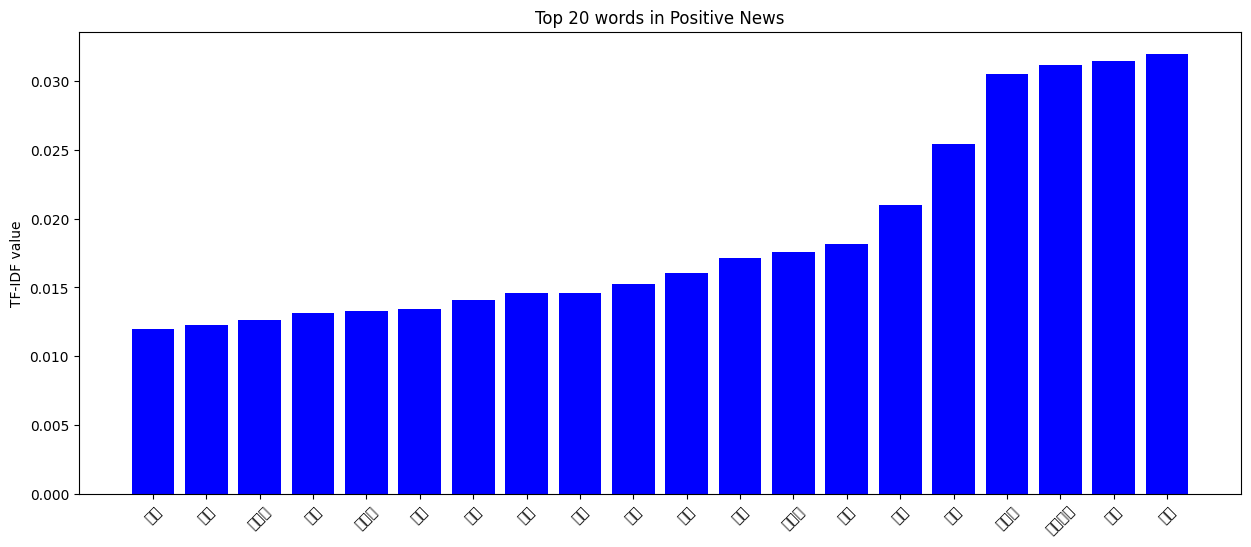

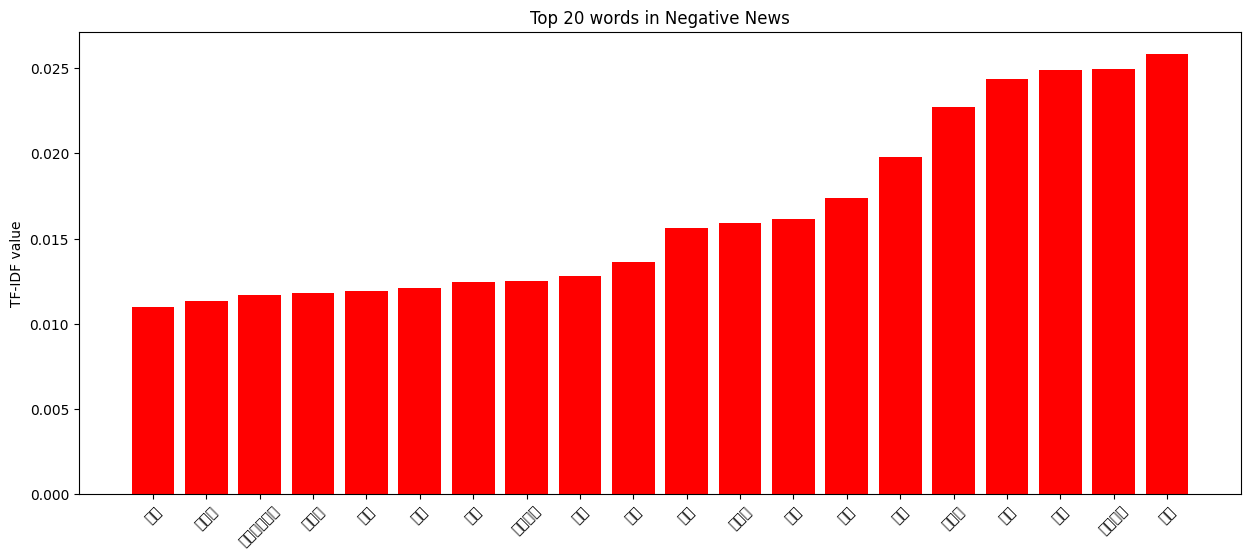

In [ ]:
import matplotlib.pyplot as plt
# 데이터 추출
positive_words_data = positive_top_words[0][0]
positive_values_data = positive_top_words[0][1].tolist()[0]
negative_words_data = negative_top_words[0][0]
negative_values_data = negative_top_words[0][1].tolist()[0]

# 긍정적인 뉴스의 상위 20개 단어 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(positive_words_data, positive_values_data, color='blue')
plt.xticks(rotation=45)
plt.title("Top 20 words in Positive News")
plt.ylabel("TF-IDF value")
plt.show()

# 부정적인 뉴스의 상위 20개 단어 그래프 그리기
plt.figure(figsize=(15, 6))
plt.bar(negative_words_data, negative_values_data, color='red')
plt.xticks(rotation=45)
plt.title("Top 20 words in Negative News")
plt.ylabel("TF-IDF value")
plt.show()


In [ ]:
# 비슷한 그룹의 뉴스 그룹핑

In [ ]:
from sklearn.cluster import KMeans

# 전체 뉴스 텍스트에 대해 TF-IDF 벡터화
tfidf_vectorizer_all = TfidfVectorizer(max_features=5000, max_df=0.95, min_df=2)
tfidf_all = tfidf_vectorizer_all.fit_transform(data_cp949['combined'])

# K-means 클러스터링
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_all)

# 각 클러스터별 대표적인 단어들을 확인
cluster_top_words = {}
for i in range(num_clusters):
    cluster_center = kmeans.cluster_centers_[i]
    top_indices = cluster_center.argsort()[-10:][::-1]
    top_words = np.array(tfidf_vectorizer_all.get_feature_names_out())[top_indices]
    cluster_top_words[i] = top_words

cluster_top_words


{0: array(['위해', '대종상영화제', '이번', '위한', '인해', '온라인', '통해', '참석한', '마스크', '최근'],
       dtype=object),
 1: array(['신종', '바이러스', '감염증', '있다', '확진', '확진자', '따르면', '지난', '리치웨이', '판정을'],
       dtype=object),
 2: array(['오후', '서울', '서울의료원', '수고해', '중랑구', '잠시멈춤', '서울의료원에서', '진료를', '콘서트',
        '위해'], dtype=object),
 3: array(['포스트', '디지털', '클라우드', '시대', '데이터', '언택트', '새로운', '글로벌', '비대면',
        '시대에'], dtype=object),
 4: array(['있는', '어려움을', '겪고', '장기화로', '위해', '지원', '이번', '인해', '지역', '겪는'],
       dtype=object)}

In [ ]:
# 비슷한 키워드 뉴스 추천

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# "확진자" 키워드의 TF-IDF 벡터 생성
keyword_vector = tfidf_vectorizer_all.transform(["확진자"])

# 유사도 계산
similarities = cosine_similarity(keyword_vector, tfidf_all)

# 가장 유사한 뉴스 기사 5개의 인덱스 추출
top_indices = similarities.argsort()[0, -5:][::-1]

# 추천된 뉴스 기사 출력
recommended_news = data_cp949.iloc[top_indices]
recommended_news[['title', 'description']]


,title,description
570,속보 강서구 코로나 확진자 명 추가 발생 리치웨이 관련,강서구 코로나 확진자 명이 추가 발생했다 일 강서구청은 코로나 확진자 ...
643,금천구 코로나 확진자 근무지에 출장 선별진료소 운영,금천구 구청장 유성훈 는 번 번 확진자가 발생한 지난 일 오후 번 확진자 세 ...
576,의성군 코로나 확진자 모두 완치 청정지역 부각,받으며 코로나 청정 지역이 됐다 의성군 재난안전대책본부에 따르면 남아있던 환자...
68,전문 남양주시청 번째 확진자 발생 동선공개 화도읍 마석우리 서희스타,남양주시청이 코로나 번째 확진자 발생을 알렸다 남양주시 번째 확진자는 세...
732,경기도 누적 확진자 명 넘어 일만에 명,경기도는 일 시 기준 코로나 누적 확진자가 명으로 전날보다 명 증가했다...


In [ ]:
# 사용자 입력을 받아 감성 분석 결과를 출력하는 함수

def sentiment_analysis():
    test = input('감성 분석할 문장입력 >> ')

    # 입력 텍스트에 대한 전처리 수행
    test = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(test)
    test = [" ".join(test)]

    # 입력 텍스트의 피처 벡터화
    test_tfidf = tfidf_vectorizer.transform(test)

    # 감성분석 모델에 적용하여 감성 분석 평가
    test_predict = logreg_combined.predict(test_tfidf)

    # 예측 값 출력하기
    if(test_predict == 0):
        return test[0] + " ->> 부정 감성"
    else:
        return test[0] + " ->> 긍정 감성"

# 함수를 실행하여 결과 확인
sentiment_result = sentiment_analysis()
sentiment_result


감성 분석할 문장입력 >> 코로나 확진


'코로나 확진 ->> 부정 감성'